***
## Part 2: Exploratory Data Analysis
***
  - Exploring relationship between Categorical valiables and numeric target variable
  - Exploring relationship between numeric valiables and numeric target variable
  - Validating the relationship using statistical tests and visualizations 

In [2]:
import pandas as pd, numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import joblib
import matplotlib.pyplot as plt, seaborn as sns

In [3]:
#loading data
df= joblib.load("D:\\Python WD\\codebase\\model_objects\\dataset_feature_engineered")

In [265]:
print('sample data')
df.head(5)

sample data


,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,race,resident_status,date_of_birth,amount,age_at_admission,age_band,bmi,duration_of_stay,count_of_medical_history,bmi_band
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1,0,0,0,0,0,...,Indian,Singaporean,1976-12-19,15405.42,34.0,middle_aged,27.51,10,1,overweight
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0,0,0,0,0,0,...,Malay,Singaporean,1978-07-20,23303.00,32.0,middle_aged,30.62,10,0,obese
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0,0,0,0,0,0,...,Indian,Singaporean,1967-08-14,16813.12,43.0,middle_aged,31.58,11,0,obese
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1,0,0,0,1,1,...,Chinese,PR,1967-12-06,27994.88,43.0,middle_aged,27.87,12,3,overweight
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0,0,0,0,1,1,...,Others,PR,1982-07-18,10707.95,28.0,young_aged,21.72,8,2,normal


In [270]:
#outlier adjusting the data for better visualization of box plots wherever required
df_outlier_adj= df
numeric= 'amount'
df_outlier_adj.loc[df[numeric]> df[numeric].quantile(0.95),numeric]=df[numeric].quantile(0.95)

In [271]:
#data preparation function for appying statistical analysis
def data_transform(df, numeric, categorical):
    df[categorical]= df[categorical].astype('category')
    category_list= df[categorical].cat.categories.tolist()
    data_list=[]
    
    for c in category_list:
        data_list.append(df[df[categorical]==c][numeric])
    
    return data_list

## 1) Analysis of 'amount' with 'gender'

In [272]:

numeric= 'amount'
categoric= 'gender'

data_list= data_transform(df, numeric= numeric,
categorical= categoric)
    
    

#### Applying statistical test 
We apply The **Kruskal-Wallis H-test**<br>
The Kruskal-Wallis H-test tests the null hypothesis that the *population
median of all of the groups are equal*.  It is a non-parametric version of
ANOVA

In [273]:
from scipy import stats
print("number of categories= "+str(len(data_list)))
stats.kruskal(data_list[0],data_list[1])

number of categories= 2


KruskalResult(statistic=13.763832733925032, pvalue=0.00020728873734852818)

**Since, p is less than .05, we can reject the null hpothesis<br>  We can say that "amount" does  depend upon gender** <br> 
Let us study the relationship of median value of "amount" for each category  

#### Median value of amount per category

In [285]:
print("Median amount in each category")
median_amount=df.groupby(categoric).agg({numeric:'median'}).sort_values(numeric,ascending=False).reset_index()
median_amount
print("Mean amount and count in each category")
mean_amount=df.groupby(categoric).agg({numeric:['mean','count']}).reset_index()
mean_amount.columns=[categoric, 'mean_'+numeric,'count']
mean_amount

Median amount in each category


,race,amount
0,Malay,27549.440
1,Indian,22742.295
2,Others,19777.220
3,Chinese,17978.185


Mean amount and count in each category


,race,mean_amount,count
0,Chinese,18950.273627,2166
1,Indian,23329.923284,344
2,Malay,27897.635332,707
3,Others,20800.376583,183


Text(0.5, 1.0, 'Distribution of amount with gender')

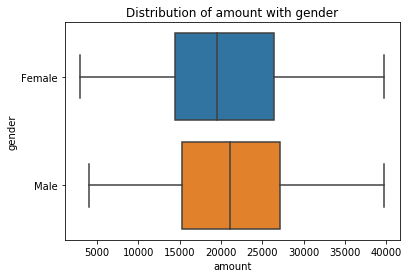

In [276]:
sns.boxplot(y=categoric, x=numeric, data= df)
text= "Distribution of "+numeric+" with "+categoric
plt.title(text)


Text(0.5, 1.0, 'Count of patients for each category of gender')

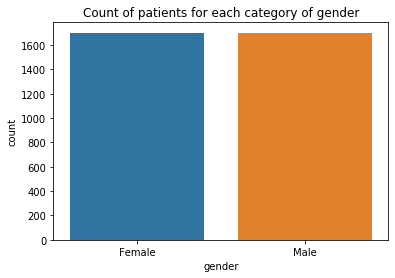

In [279]:
sns.barplot(x= categoric,y= 'count',data= mean_amount)
plt.title('Count of patients for each category of '+categoric)

Text(0.5, 1.0, 'distribution of amount for each gender')

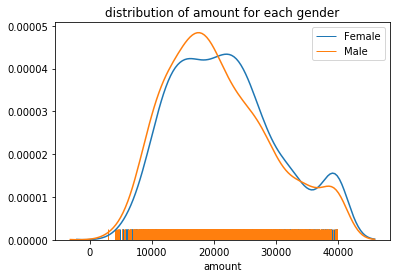

In [280]:
sns.distplot(df[df.gender=='Male']['amount'],hist=False, rug=True)
sns.distplot(df[df.gender=='Female']['amount'], hist=False, rug=True)
plt.legend(df[categoric].cat.categories.to_list())
plt.title('distribution of '+ numeric+ ' for each '+categoric)


#### Inference
- **Median amount has statistically significant difference for different gender category. Males spend 1500 more as a general tendency**
- **Distribution of Male and Female patients is same in the sample but all Males spend slightly higher amount in total**

## 2) Analysis of 'amount' with 'race'

In [287]:
numeric= 'amount'
categoric= 'race'

data_list= data_transform(df, numeric= numeric,
categorical= categoric)
    

#### Applying statistical test 

In [288]:
from scipy import stats
print("number of categories= "+str(len(data_list)))
stats.kruskal(data_list[0],data_list[1],data_list[2],data_list[3])

number of categories= 4


KruskalResult(statistic=554.7185817316944, pvalue=6.593981043180389e-120)

#### Interpretation of statistical test
**Since, p is less than .05, we can reject the null hpothesis<br>
Therefore, population median of all groups are not equal**
  <br>
We can say that "amount" does depends upon the race    <br>

Let us study the relationship of median value of "amount" for each category

#### Median value of amount per category

In [289]:
print("Median amount")
median_amount=df.groupby(categoric).agg({numeric:'median'}).sort_values(numeric,ascending=False).reset_index()
median_amount
print("Mean amount and count in each category")
mean_amount=df.groupby(categoric).agg({numeric:['mean','count']}).reset_index()
mean_amount.columns=[categoric, 'mean_'+numeric,'count']
mean_amount

Median amount


,race,amount
0,Malay,27549.440
1,Indian,22742.295
2,Others,19777.220
3,Chinese,17978.185


Mean amount and count in each category


,race,mean_amount,count
0,Chinese,18950.273627,2166
1,Indian,23329.923284,344
2,Malay,27897.635332,707
3,Others,20800.376583,183


Text(0.5, 1.0, 'Distribution of amount with race')

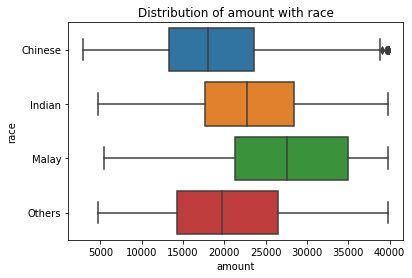

In [290]:
sns.boxplot(y=categoric, x=numeric, data= df_outlier_adj)
text= "Distribution of "+numeric+" with "+categoric
plt.title(text)

Text(0.5, 1.0, 'Count of patients for each category of race')

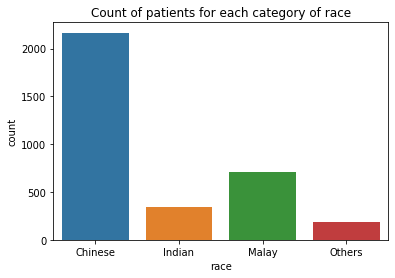

In [292]:
sns.barplot(x= categoric,y= 'count',data= mean_amount)
plt.title('Count of patients for each category of '+categoric)

Text(0.5, 1.0, 'distribution of amount for each race')

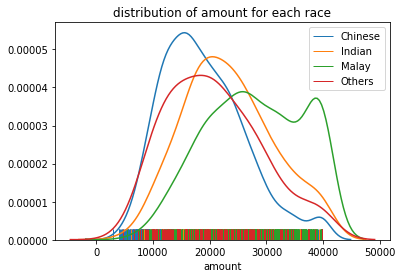

In [296]:
# Distribution plot 
sns.distplot(df[df[categoric]=='Chinese'][numeric],hist=False, rug=True)
sns.distplot(df[df[categoric]=='Indian'][numeric], hist=False, rug=True)
sns.distplot(df[df[categoric]=='Malay'][numeric], hist=False, rug=True)
sns.distplot(df[df[categoric]=='Others'][numeric], hist=False, rug=True)

plt.legend(df[categoric].cat.categories.to_list())
plt.title('distribution of '+ numeric+ ' for each '+categoric)


#### Inference
- **Median time spent is significantly different for different categories of Race.** 
- **If sample is assumed to be representative of the population, More chinese were admitted than combined total of all other races**
- **Being a Malay, one has significantly higher median cost of treatment. Malay patients show a *multi-modal distribution*. It means within Malay race, there are two groups: one taking normal cost treatment and other taking very high cost treatment**

***Race is a big determinant of Cost of treatment. Malay population show interesting multimodal characteristic in the amount***


## 3) Analysis of 'amount' with 'resident_status'

In [299]:
numeric= 'amount'
categoric= 'resident_status'

data_list= data_transform(df, numeric= numeric,
categorical= categoric)
    

#### Applying statistical test 

In [300]:
from scipy import stats
print("number of categories= "+str(len(data_list)))
stats.kruskal(data_list[0],data_list[1],data_list[2])

number of categories= 3


KruskalResult(statistic=342.3441236705175, pvalue=4.580554860159675e-75)

**Since, p is less than .05, we can reject the null hpothesis<br>
We can say that "amount" depends upon the category variable** <br>   
Let us study the relationship of median value of "amount" for each category 

#### Median value of amount per category

In [301]:
print("median amount")
median_amount=df.groupby(categoric).agg({numeric:'median'}).sort_values(numeric,ascending=False).reset_index()
median_amount
print("mean amount and count in each category")
mean_amount=df.groupby(categoric).agg({numeric:['mean','count']}).reset_index()
mean_amount.columns=[categoric, 'mean_'+numeric,'count']
mean_amount

median amount


,resident_status,amount
0,Foreigner,37662.64
1,PR,23331.73
2,Singaporean,19201.53


mean amount and count in each category


,resident_status,mean_amount,count
0,Foreigner,34049.046489,161
1,PR,23952.864629,515
2,Singaporean,20111.696627,2724


Text(0.5, 1.0, 'Distribution of amount with resident_status')

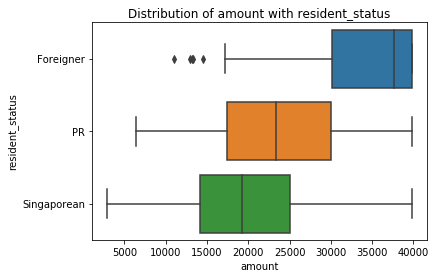

In [302]:

sns.boxplot(y=categoric, x=numeric, data= df)
text= "Distribution of "+numeric+" with "+categoric
plt.title(text)


Text(0.5, 1.0, 'Count of patients for each category of resident_status')

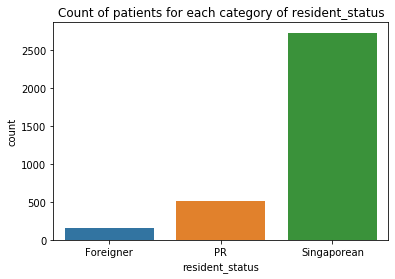

In [303]:
sns.barplot(x= categoric,y= 'count',data= mean_amount)
plt.title('Count of patients for each category of '+categoric)

Text(0.5, 1.0, 'distribution of amount for each resident_status')

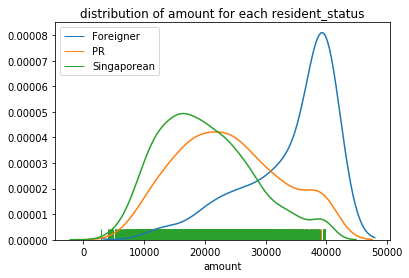

In [305]:
# Distribution plot 
sns.distplot(df[df[categoric]=='Foreigner'][numeric],hist=False, rug=True)
sns.distplot(df[df[categoric]=='PR'][numeric], hist=False, rug=True)
sns.distplot(df[df[categoric]=='Singaporean'][numeric], hist=False, rug=True)

plt.legend(df[categoric].cat.categories.to_list())
plt.title('distribution of '+ numeric+ ' for each '+categoric)


#### Inference
- **There is statistical evidence found that Median time amount is different for different nationality status**
- **Foreigners have to spend significantly higher for the treatment as is visible in the distribution**
- **Most patients in the sample have Singaporean resident status**


## 4) Analysis of 'amount' with 'age band'

In [307]:
numeric= 'amount'  
categoric= 'age_band'  

data_list= data_transform(df, numeric= numeric,
categorical= categoric)
    

#### Applying statistical test 

In [308]:
from scipy import stats
print("number of categories= "+str(len(data_list)))
stats.kruskal(data_list[0],data_list[1],data_list[2])

number of categories= 3


KruskalResult(statistic=342.21734023628164, pvalue=4.880325197186907e-75)

**Since, p is less than .05, we can reject the null hpothesis <br> 
We can say that "amount" depends upon the age band**  <br><br>
Let us study the relationship of median value of "amount" for each age band

#### Median value of amount per category

In [309]:
print("Median amount")
median_amount=df.groupby(categoric).agg({numeric:'median'}).sort_values(numeric,ascending=False).reset_index()
median_amount
print("Mean amount and count in each category")
mean_amount=df.groupby(categoric).agg({numeric:['mean','count']}).reset_index()
mean_amount.columns=[categoric, 'mean_'+numeric,'count']
mean_amount

Median amount


,age_band,amount
0,old_aged,23345.65
1,middle_aged,17790.08
2,young_aged,15102.35


Mean amount and count in each category


,age_band,mean_amount,count
0,middle_aged,18945.606434,1573
1,old_aged,23931.550610,1721
2,young_aged,15228.734528,106


Text(0.5, 1.0, 'Distribution of amount with age_band')

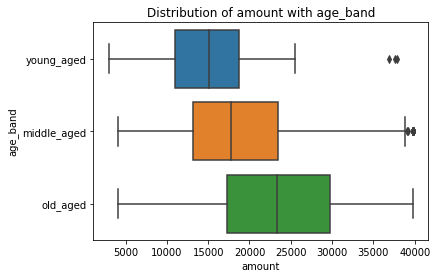

In [310]:
order=['young_aged','middle_aged','old_aged']
sns.boxplot(y=categoric, x=numeric, data= df, order=order)
text= "Distribution of "+numeric+" with "+categoric
plt.title(text)

Text(0.5, 1.0, 'Count of patients for each category of age_band')

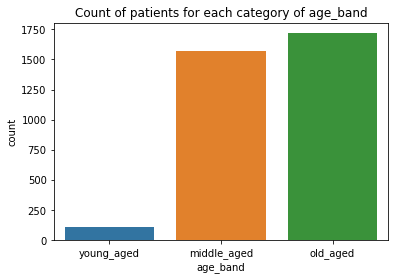

In [246]:
sns.barplot(x= categoric,y= 'count',data= mean_amount, order= order)
plt.title('Count of patients for each category of '+categoric)

Text(0.5, 1.0, 'distribution of amount for each age_band')

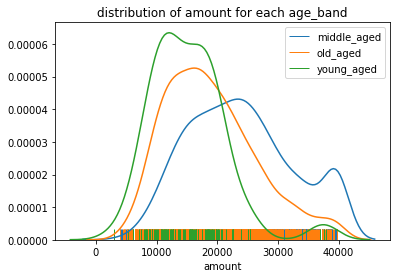

In [251]:
sns.distplot(df[df.age_band=='old_aged'][numeric],hist=False, rug=True)
sns.distplot(df[df.age_band=='middle_aged'][numeric], hist=False, rug=True)
sns.distplot(df[df.age_band=='young_aged'][numeric], hist=False, rug=True)
plt.legend(df[categoric].cat.categories.to_list())
plt.title('distribution of '+ numeric+ ' for each '+categoric)


#### Inference
- **Median time spent is significantly different for different categories**
- **Most patients are from old age group and have the highest median cost of treatment**
- **young age band(up to 30 years) are few and spend less**
- **medium age band(30 to 50 years) have a multimodal distribution. There are a few that have taken very high cost treatment of around 40000**


## 5) Analysis of 'amount' with 'bmi_band'

In [311]:
numeric= 'amount'
categoric= 'bmi_band'

data_list= data_transform(df, numeric= numeric,
categorical= categoric)
    

#### Applying statistical test 

In [312]:
from scipy import stats
#del str
print("number of categories= "+str(len(data_list)))
stats.kruskal(data_list[0],data_list[1], data_list[2],data_list[3])


number of categories= 4


KruskalResult(statistic=59.23154220387103, pvalue=8.578384497396096e-13)

**Since, p is less than .05, we can reject the null hpothesis  <br>
We can say that "amount" does depend upon bmi_band**<br><br>
Let us visualize the median value of "amount" for each category 

#### Median value of amount per category

In [315]:
print("Median amount for each category")
median_amount=df.groupby(categoric).agg({numeric:'median'}).sort_values(numeric,ascending=False).reset_index()
median_amount
print("Count and mean amount for each category")
mean_amount=df.groupby(categoric).agg({numeric:['mean','count']}).reset_index()
mean_amount.columns=[categoric, 'mean_'+numeric,'count']
mean_amount

Median amount for each category


,bmi_band,amount
0,obese,21861.230
1,overweight,19735.800
2,normal,18201.105
3,underweight,8856.220


Count and mean amount for each category


,bmi_band,mean_amount,count
0,normal,20013.575781,576
1,obese,22602.953008,1361
2,overweight,20751.332110,1458
3,underweight,11200.494000,5


Text(0.5, 1.0, 'Distribution of amount with bmi_band')

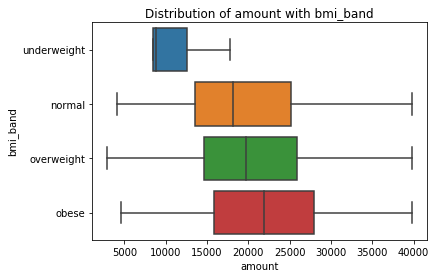

In [319]:
order=['underweight','normal','overweight','obese']
sns.boxplot(y=categoric, x=numeric, data= df_outlier_adj, order= order)
text= "Distribution of "+numeric+" with "+categoric
plt.title(text)

Text(0.5, 1.0, 'Count of patients for each category of bmi_band')

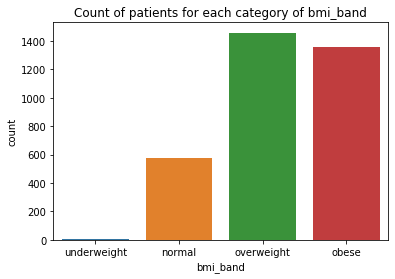

In [320]:
sns.barplot(x= categoric,y= 'count',data= mean_amount, order= order)
plt.title('Count of patients for each category of '+categoric)

#### Inference
- **Statistical evidence found of Median amount depending on BMI_index of the patient**
- **An obese patient has to spend slightly higher than other patients**
- **Hardly few patients were found underweight. More than 80% of patients were either over-weight or obese. Assuming the sample represents overall population of patients, bmi_index is a strong predictor of hospital admission**
#### *We can say obesity is strongly linked to admitting in hospital. Meaning if someone is overweight, he has significantly higher chances of hospitalization than if he is normal-weight*


## 7) Analysis of 'amount' with 'duration_of_stay'

In [328]:
numeric1= 'amount'
numeric2= 'duration_of_stay'


#### Visually exploring the relationship between both variables


Text(0.5, 1, 'Plot of amount with duration_of_stay')

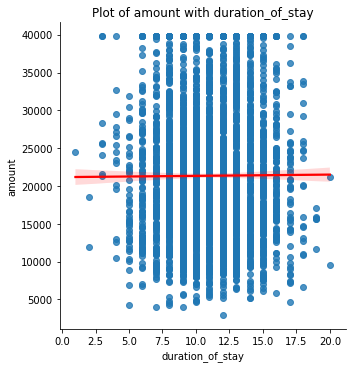

In [331]:
sns.lmplot(x= numeric2, y=numeric1, data= df , line_kws={'color': 'red'})
plt.title("Plot of "+numeric1+" with "+numeric2)

Quantifying the relationship through correlation coefficient

#### Applying statistical test: Pearson correlation coefficient

The Pearson correlation coefficient measures the linear relationship
between two datasets

In [327]:
stats.pearsonr(df[numeric1],df[numeric2])

(0.005608916653346545, 0.7437166376886049)

Since, p is not less than .05, we can not reject the null hpothesis  

Both the variables are not significantly correlated

#### Inference
**Duration of stay in hospital is not correlated with Amount spent**

## 8) Analysis of 'amount' with 'count_of_medical_history'

In [333]:
numeric1= 'amount'
numeric2= 'count_of_medical_history'
#here count of medical history is a feature defined to indicate the number of unique medical histories the patient had had at the time of admission

#### Visually exploring the relationship between both variables


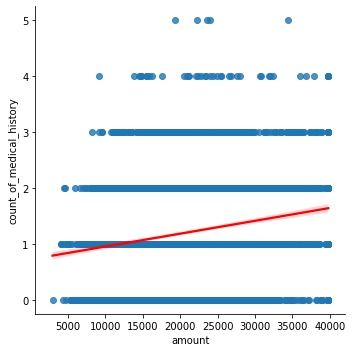

In [334]:

sns.lmplot(x= numeric1, y=numeric2, data= df , line_kws={'color': 'red'})


Quantifying the relationship through correlation coefficient

#### Applying statistical test: Pearson correlation coefficient

The Pearson correlation coefficient measures the linear relationship
between two datasets

In [335]:
df_na_removed= df[[numeric1,numeric2]].dropna(axis=0)
stats.pearsonr(df_na_removed[numeric1],df_na_removed[numeric2])


(0.2016130113079763, 1.6201666141863258e-32)

Since, p is less than .05, we can reject the null hpothesis <br> 
Both the variables are correlated with a corrlation coefficient of .2


#### Inference
Amount and count of medical history are correlated. A patient having more medical history is likely to spend more

## 9) Analysis of 'amount' with 'age_at_admission'

In [337]:
numeric1= 'amount'
numeric2= 'age_at_admission'

#### Visually exploring the relationship between both variables


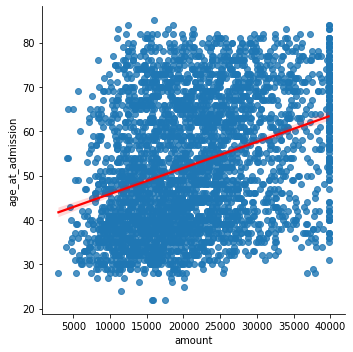

In [338]:

sns.lmplot(x= numeric1, y=numeric2, data= df , line_kws={'color': 'red'})


Plot shows a positive trent. Let us Quantifying the relationship through correlation coefficient

#### Applying statistical test: Pearson correlation coefficient

The Pearson correlation coefficient measures the linear relationship
between two datasets

In [339]:
df_na_removed= df[[numeric1,numeric2]].dropna(axis=0)
stats.pearsonr(df_na_removed[numeric1],df_na_removed[numeric2])


(0.33979245127374436, 1.1967745303783109e-92)

Since, p is less than .05, we can not reject the null hpothesis <br> 
Both the variables are correlated 

Correlation coefficient is just .33

#### Inference
Patient having higher age at the time of admission is likely to spend more on treatment

## 10) Analysis of 'amount' with 'bmi'

In [342]:
numeric1= 'bmi'
numeric2= 'amount'

#### Visually exploring the relationship between both variables


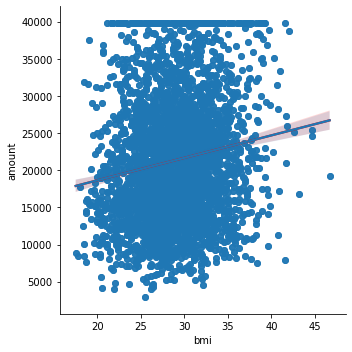

In [344]:

sns.lmplot(x= numeric1, y=numeric2, data= df , line_kws={'color': 'red'})
sns.regplot(x= numeric1, y=numeric2, data= df)


Quantifying the relationship through correlation coefficient

#### Applying statistical test: Pearson correlation coefficient

The Pearson correlation coefficient measures the linear relationship
between two datasets

In [345]:
df_na_removed= df[[numeric1,numeric2]].dropna(axis=0)
stats.pearsonr(df_na_removed[numeric1],df_na_removed[numeric2])


(0.1472431255489256, 6.15708053548615e-18)

Since, p is less than .05, we can reject the null hpothesis <br> 
Both the variables are correlated 

Correlation coefficient is just .147

#### Inference
A patient having higher bmi is likely to spend more amount

## 11) Analysis of age_band and bmi band with amount

Text(0.5, 1, 'Heatmap of bmi and age band with average amount spent')

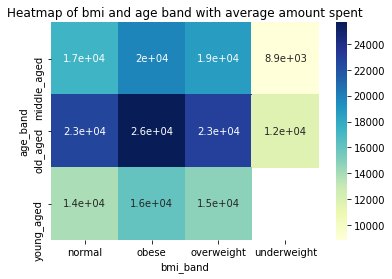

In [363]:
def my_heatmap(dataset, X, Y, Z, aggfunc= np.mean):
    a= dataset.pivot_table(index= Y, columns= X, aggfunc= aggfunc,values=  Z)
    sns.heatmap(a, annot=True, cmap="YlGnBu" )
my_heatmap(dataset= df, X= 'bmi_band', Y= 'age_band', Z= 'amount')
plt.title('Heatmap of bmi and age band with average amount spent')


#### Inference
**Old age- obese is in the category of maximum spending**

## 12) Analysis of race and resident_status with amount

Text(0.5, 1, 'Heatmap of race and resident_status with average amount spent')

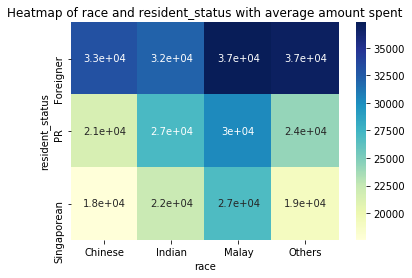

In [365]:
my_heatmap(dataset= df, X= 'race', Y= 'resident_status', Z= 'amount')
plt.title('Heatmap of race and resident_status with average amount spent')


#### Inference
**Malay- Foreigner and other-Foreigner group is in the category of maximum spending**

## 13) Correlation analysis between variables

,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,...,lab_result_1,lab_result_2,lab_result_3,weight,height,amount,age_at_admission,bmi,duration_of_stay,count_of_medical_history
medical_history_1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379083
medical_history_2,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478404
medical_history_3,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.355241
medical_history_4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medical_history_5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medical_history_6,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.440426
medical_history_7,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.440048
preop_medication_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preop_medication_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preop_medication_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1, 'correlation heatmap for correlations above .3')

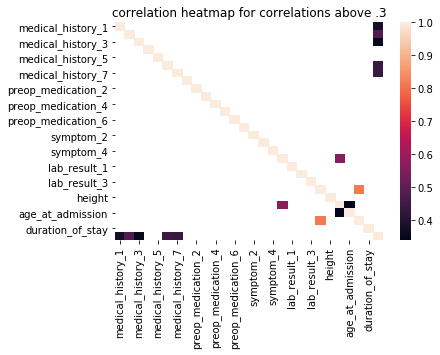

In [405]:
corr = df.corr()

temp= corr[corr>.3]
#filtering correlations with correlation above .3
sns.heatmap(temp, cbar="YlGnBu")
plt.title('correlation heatmap for correlations above .3')

#### Inference
- **medium Correlation found between Medical history 1,2,3 and duration of stay**
- **low correlation found between amount and age at admission**
- **medium correlation found between weight and bmi**
- **medium correlation found between symptom 5 and amount**

